In [ ]:
!pip install APIMakeSens

In [7]:
from MakeSens import MakeSens
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
estacion = 'mE1_00008'           # Nombre estacion miniEva
start = '2023-08-06 00:00:00'    # Fecha de inicio: año-mes-día hora:minuto:segundo
end   = '2023-08-10 00:00:00'    # Fecha de fin:    año-mes-día hora:minuto:segundo
frec  = 'm'                      # m: minutos, h: horas, d: días

data = MakeSens.download_data(estacion, start, end,frec) # Descargar los datos

In [4]:
temp = data[["temperatura", "temperatura2"]].copy()
temp.columns = ["T1", "T2"]                           # Renombramos las columnas 
temp.index = pd.to_datetime(temp.index)               # Convertimos el indice a formato datetime

In [5]:
temp['mean'] = (temp['T1'] + temp['T2'])/2
temp_mean = temp['mean']                            # Promedio
temp_mean_h = temp_mean.resample('h').mean()        # Remuestreo a horas usando el promedio
temp_mean_d = temp_mean.resample('d').mean()        # Remuestreo a días usando el promedio
temp_mean_m = temp_mean.resample('3 min').mean()    # Remuestreo a minutos usando el promedio

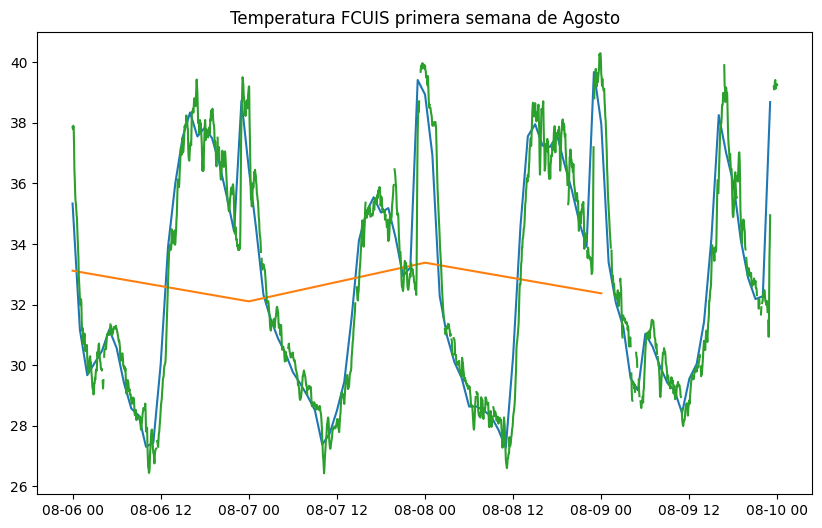

In [15]:
plt.figure(figsize=(10,6))
plt.plot(temp_mean_h.index, temp_mean_h)
plt.plot(temp_mean_d.index, temp_mean_d)
plt.plot(temp_mean_m.index, temp_mean_m)
#plt.plot(temp.index, temp['T1'])
#plt.plot(temp.index, temp['T2'])

plt.title('Temperatura FCUIS primera semana de Agosto')
plt.show()